# Principal Component Analysis

## Why Dimensionality Reduction is required?
- Better Visualization
- Reduction of Noise
- Preservation of useful information in low memory
- Less time complexity
- less space complexity

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
%matplotlib inline

## Load the Dataset

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
features_df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
response = cancer['target']
features_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
response.size == features_df.shape[0]

True

## Performing PCA
***
1. Eigen value decomposition of the covariance matrix}
2. Singular value decomposition of data matrix
3. Scikit-learn PC

### Pre- Req: Standardize the Data
Let's Rescale the feature vector(Nomalization)    

In [4]:
from sklearn.preprocessing import StandardScaler
scaled_X = StandardScaler().fit_transform(features_df)

### Eigen Value Decomposition of  covariance matrix
***
**Step 1:** Calculate the covariance matrix

**Step 2:** Calculate Eigen Vectors and Eigen Values from Covariance Matrix

**Step 3:** Choose Principal Components (Select Eigenvectors with Highest Eigenvalues)

**Step 4:** Project Original Matrix onto Eigenvectors

#### Step 1: Calculate covariance Matrix

In [5]:
covariance_matrix = np.cov(scaled_X.T)
covariance_matrix.shape

(30, 30)

#### Step 2. Calculate Eigen Vectors and Eigen Values from Covariance Matrix

**Eigen Values** - Determines the magnitude of the vector (higher number captures more variance)

**Eigen Vectors** - Determines the direction of the vector 

In [6]:
#Calculate eigen vectors and eigen values of the covariance matrix 
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)
print(f'1st two eigen values: {eig_vals[0:2]} \ncorresponding eigen vectors:\n {eig_vecs[0:2]}')

1st two eigen values: [13.30499079  5.7013746 ] 
corresponding eigen vectors:
 [[ 2.18902444e-01 -2.33857132e-01 -8.53124284e-03  4.14089623e-02
  -3.77863538e-02  1.87407904e-02  1.24088340e-01  7.45229622e-03
  -2.23109764e-01  9.54864432e-02  4.14714866e-02  5.10674568e-02
   1.19672116e-02 -5.95061348e-02  5.11187749e-02 -1.50583883e-01
   2.02924255e-01  1.46712338e-01 -2.25384659e-01 -7.02414091e-01
   2.11460455e-01 -2.11194013e-01 -1.31526670e-01  1.29476396e-01
   1.92264989e-02 -1.82579441e-01  9.85526942e-02 -7.29289034e-02
  -4.96986642e-02  6.85700057e-02]
 [ 1.03724578e-01 -5.97060883e-02  6.45499033e-02 -6.03050001e-01
   4.94688505e-02 -3.21788366e-02 -1.13995382e-02 -1.30674825e-01
   1.12699390e-01  2.40934066e-01 -3.02243402e-01  2.54896423e-01
   2.03461333e-01  2.15600995e-02  1.07922421e-01 -1.57841960e-01
  -3.87061187e-02 -4.11029851e-02 -2.97886446e-02 -2.73661018e-04
  -1.05339342e-02  6.58114593e-05 -1.73573093e-02  2.45566636e-02
  -8.47459309e-02  9.8786789

**Remember:** The eigen values capture variance of each eigen vecctors. Variance can be found by dividing value by total sum of eigne values.

**1st Principal Component:** about 44% variance is explained by it.

In [7]:
eig_vals[0]/sum(eig_vals)

0.44272025607526344

**2nd Principal Component:** about 19% variance is explained by it.

In [8]:
eig_vals[1]/sum(eig_vals)

0.18971182044033105

#### Step 3: Choose Principal Components (Select Eigen Vectors with heighest Eigen Values)

In [9]:
V = eig_vecs[:,:2]

#### Step 4: Project Original Matrix onto Eigen vectors

In [10]:
projected_X = scaled_X.dot(V)
projected_X = pd.DataFrame(projected_X,columns=['PC1','PC2'])
projected_X.head()

,PC1,PC2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


This is the new Data set for features and it contains (44+19)% variance of entire data.

### Singular Value Decomposition
***
**Step 1:** Center the data 

**Step 2:** Apply SVD to the centered data

**Step 3:** Choose number of principle components 

**Step 4:** Compute dot product of matrix X and W

**Step 5:** You now have your new reduced dimensionality of the dataset

In [11]:
# Scaled Data is already cetralized 
U, S, V = np.linalg.svd(scaled_X)
W = V.T[:,:2]
projected_X = scaled_X.dot(W)
projected_X = pd.DataFrame(projected_X,columns=['PC1','PC2'])
projected_X.head()

,PC1,PC2
0,-9.192837,-1.948583
1,-2.387802,3.768172
2,-5.733896,1.075174
3,-7.122953,-10.275589
4,-3.935302,1.948072


## Performing PCA using SCi-Kit Learn

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=2)
pcomponents = pca.fit_transform(scaled_X)
projected_X = pd.DataFrame(pcomponents,columns=['PC1', 'PC2'])
projected_X.head()

,PC1,PC2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


### Visualizing Principal Components

Note: We have reduuced 30 features to 2 new features .

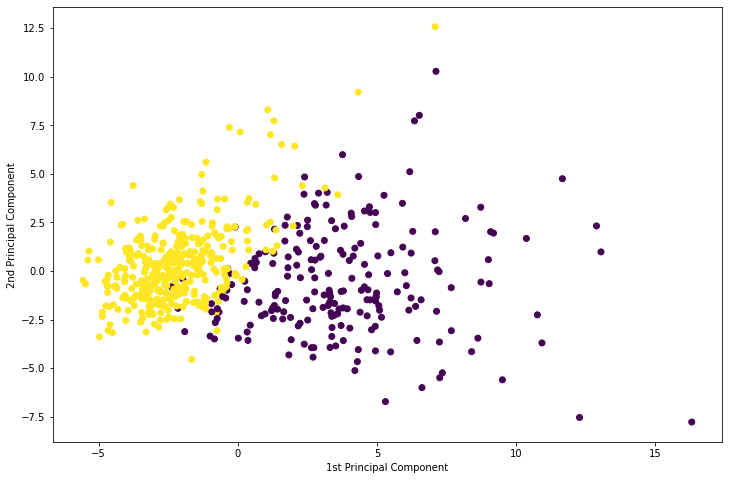

In [14]:
plt.figure(figsize=(12,8))
plt.scatter(projected_X.PC1,projected_X.PC2,c=response)
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.show()

### Explained Variance

In [15]:
# in terms of eigen values 
pca.explained_variance_

array([13.30499079,  5.7013746 ])

In [16]:
# in terms of ratios
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

### Interpreting Principal Components

In [17]:
pd.DataFrame(pca.components_,columns=features_df.columns,index=['PC1', 'PC2'])

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
PC1,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
PC2,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


### Choosing Right Number of Dimensions

In [18]:
def interact_fun(n):
    pca = PCA(n_components=n)
    pcomponents = pca.fit_transform(scaled_X)
    explained_var = sum(pca.explained_variance_ratio_)
    print(f'Explained Variance by {n} components:  {explained_var:.3}')
interact(interact_fun,n=widgets.IntSlider(1,1,30))

interactive(children=(IntSlider(value=1, description='n', max=30, min=1), Output()), _dom_classes=('widget-int…

<function __main__.interact_fun(n)>

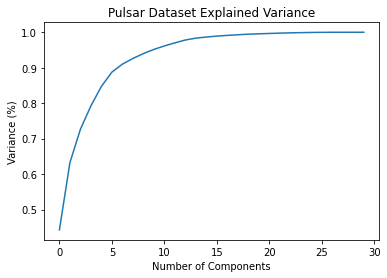

In [19]:
pca = PCA().fit(scaled_X)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

## Model Performance without PCA(~95%)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from warnings import filterwarnings
filterwarnings('ignore')

In [21]:
clf  = LogisticRegression(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(features_df,response, test_size = 0.2, random_state=1)
model = clf.fit(X_train, y_train)
result = cross_val_score(clf, X_train, y_train, cv=6, scoring='f1')
result.mean()

0.9548765606252724

## Model Performance with PCA (~98%)

In [22]:
pca = PCA(n_components=10)
pcomponents = pca.fit_transform(scaled_X)
projected_X = pd.DataFrame(pcomponents,columns=['PC'+str(i+1) for i in range(pcomponents.shape[1])])
projected_X.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411425,2.159373,-0.398404,-0.157127,-0.877402
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240989,-0.711905,1.106986
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668170,0.097370,0.024075,0.454288
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053421,1.429897,1.059551,-1.405404,-1.116943
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936215,0.636374,-0.263799,0.377708


In [23]:
X_train, X_test, y_train, y_test = train_test_split(projected_X,response, test_size=0.2, random_state=1)
model = clf.fit(X_train, y_train)
result = cross_val_score(clf, X_train, y_train, cv=10, scoring='f1')
result.mean()

0.9808811918750704